Олег, доброго времени суток.
Добро пожаловать в мой аналитический отчет :)
Увы, он для Вас вряд ли будет таким интересным, как Вы рассказывали на занятии.
Но вот такая у меня скучная работа)
Все опять же банально.
Есть сайт по аренде аттракционов, на нем висит счетчик метрики. Я с него выгрузил сырые данные по просмотрам (визиты увы не удалось выгрузить, там такая ошибка, что даже Константин Башевой пасанул, как и "коллеги с метрики"), но вообщем-то и просмотров для моих целей должно будет хватить.
Какого-то вау эффекта не ждите, зато эти данные я потом буду реально использовать :)

Если интересно, то сайт https://attrakcion-vsem.ru/ но там как раз поменяли дизайн полностью, а данные релевантны для старой версии

In [52]:
import pandas as pd

In [53]:
hits = pd.read_csv('sql3.csv', low_memory=False)

In [54]:
hits.head()

,Artificial,Browser,BrowserCountry,BrowserEngine,BrowserEngineVersion1,BrowserEngineVersion2,BrowserEngineVersion3,BrowserEngineVersion4,BrowserLanguage,BrowserMajorVersion,...,Title,URL,UTMCampaign,UTMContent,UTMMedium,UTMSource,UTMTerm,WatchID,WindowClientHeight,WindowClientWidth
0,0,opera,NaN,WebKit,537,36,0,0,ru,49,...,Casino,http://attrakcion-vsem.ru/index.php?option=com...,NaN,NaN,NaN,NaN,NaN,18032239452380999881,885,1263
1,0,yandex_browser,NaN,WebKit,537,36,0,0,ru,17,...,Аренда игровой приставки Sony Playstation 3 и ...,http://attrakcion-vsem.ru/sony-playstation,NaN,NaN,NaN,NaN,NaN,18031560362332262095,656,1349
2,1,yandex_browser,NaN,WebKit,537,36,0,0,ru,17,...,NaN,http://attrakcion-vsem.ru/sony-playstation,NaN,NaN,NaN,NaN,NaN,18031564298077867727,656,1349
3,0,NaN,us,Unknown,0,0,0,0,en,0,...,Аренда аттракционов,http://attrakcion-vsem.ru/,NaN,NaN,NaN,NaN,NaN,18034622214498958093,300,400
4,0,yandex_browser,NaN,WebKit,537,36,0,0,ru,17,...,Casino,http://attrakcion-vsem.ru/index.php?option=com...,NaN,NaN,NaN,NaN,NaN,18032995809069114072,562,360


Так какие колонки?

In [55]:
hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171720 entries, 0 to 171719
Data columns (total 74 columns):
Artificial                  171720 non-null int64
Browser                     166045 non-null object
BrowserCountry              117202 non-null object
BrowserEngine               171702 non-null object
BrowserEngineVersion1       171720 non-null int64
BrowserEngineVersion2       171720 non-null int64
BrowserEngineVersion3       171720 non-null int64
BrowserEngineVersion4       171720 non-null int64
BrowserLanguage             171272 non-null object
BrowserMajorVersion         171720 non-null int64
BrowserMinorVersion         171720 non-null int64
ClientID                    171720 non-null uint64
ClientTimeZone              171720 non-null int64
CookieEnabled               171720 non-null int64
CounterID                   171720 non-null int64
`Date`                      171720 non-null object
`DateTime`                  171720 non-null object
DeviceCategory              1717

Много колонок пустых, постепенно будем их отфильтровывать. Тут будет в основном pandas на самом деле, визуализация самое простое в этой задаче.

In [56]:
hits[hits['GoalsID'].isna() == False ]['GoalsID'].value_counts()

27,748,804    561
Name: GoalsID, dtype: int64

На сайте только один тип цели есть - заказ аттракциона (не важно какого). Достигалась цель 561 раз.

In [57]:
import matplotlib.pyplot as plt

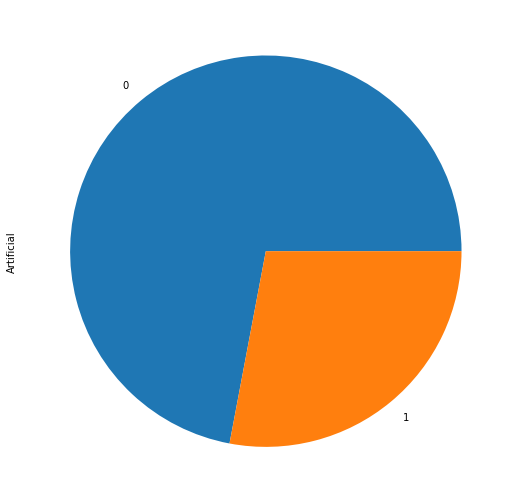

In [58]:
hits['Artificial'].value_counts().plot(kind='pie')
plt.show()

Первый график - pie chart, который в данном случае очень нагляден. Видно, что количество искусственных просмотров больше 25% от всех. Не мало! А самое интересное, что мне неизвестно, чтобы на сайте искусственно передавались просмотры. Хм... Буду разбираться.

In [59]:
hits['UTMSource'].value_counts()

rsya      38710
yandex     1860
kms         334
Name: UTMSource, dtype: int64

In [60]:
hits['UTMCampaign'][(hits['UTMCampaign'] == 'child') | (hits['UTMCampaign'] == 'razvlekat') | (hits['UTMCampaign'] == 'sport')].value_counts()

child        19162
razvlekat     1508
sport          316
Name: UTMCampaign, dtype: int64

В проекте нет единого подхода к формированию UTM меток, поэтому я вытащил только те метки, которые относятся к типу аттракционов (хотя на самом деле их 5, но не все они представлены в рекламе)

Перед дальнейщим исследованием влияния параметров на конверсию, я должен отрезать часть данных, т.к. настройка конверсии в метрике не всегда была на этом сайте.

In [61]:
hits[hits['GoalsID'].isna() == False].sort_values('`Date`')['`Date`'].head()

46315    2017-02-09
50375    2017-02-10
50148    2017-02-10
50147    2017-02-10
50146    2017-02-10
Name: `Date`, dtype: object

Хорошо, видимо цель была добавлена в метрику 8го или 9го февраля 2017 года. Кстати, этот факт, позволил мне больше понять, почему у меня не выгрузились сырые визиты - до 8го февраля 2017 года они выгружались без ошибок. Видимо какое-то поле относящиеся к цели и вызывает ошибку.

Удалим из выборки все просмотры, которые были раньше, чем 2017-02-09

In [62]:
convert = hits[hits['`Date`'] > '2017-02-08'].sort_values('`Date`')

# Гипотеза 1
Я предполагаю, что чем больше размеры видимой пользователем области, тем вероятнее, что он закажет аттракцион

In [63]:
#Сначала посмотрим какие у нас вообще бывают размеры
windows = convert[['WindowClientHeight', 'WindowClientWidth']].copy()

In [64]:
windows.drop_duplicates()

,WindowClientHeight,WindowClientWidth
46318,613,1349
46295,974,1903
46292,645,1349
46290,616,360
46289,560,360
...,...,...
171625,688,1215
171690,713,1243
171524,909,1864
171578,604,1333


Ничего себе сколько их! Хотя можно было догадаться, т.к. это могут быть не развернутые окна. Это плохо, потому что конверсий у нас не так много, давайте тогда обратимся к физическим размерам экрана.

In [65]:
screens = convert[['ScreenHeight', 'ScreenWidth']].copy()

In [66]:
screens.drop_duplicates()

,ScreenHeight,ScreenWidth
46318,768,1366
46295,1080,1920
46290,640,360
46286,568,320
49934,859,1146
...,...,...
170138,1252,2226
170905,728,1242
171162,1600,1600
171449,279,640


Уже лучше, но все равно больше, чем количество конверсий.. Ладно, посмотрим что из этого выйдет, для начала добавим в ряд конверсию, заменив ID счетчика на признак - конверсия была/конверсии не было

In [67]:
def conversion(goalsid):
    if pd.isnull(goalsid) :
        return 0
    else :
        return 1
    
convert['convert'] = convert['GoalsID'].apply(conversion)

In [68]:
screens = convert.groupby(['ScreenHeight', 'ScreenWidth']).agg({'convert' : 'sum'})
screens.reset_index(inplace = True)

Тут еще хотел разделить выборку по ориентации экрана (из-за боязни получить задвоенные результаты - одинаковый размер экрана, но разный поворот), но передумал (чтобы роль ориентации также отображалась на одном графике).

Для анализа будем использовать Bubble chart - он хорошо демонстрирует зависимости трех величин (хотя может есть решение лучше)

In [69]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

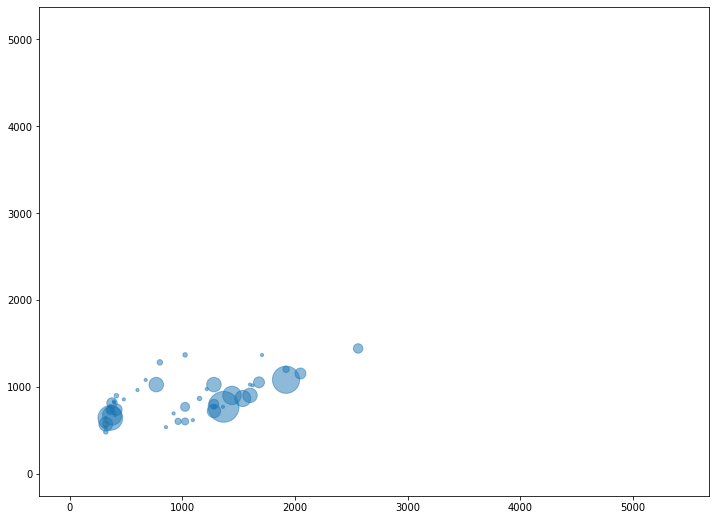

In [70]:
x = screens['ScreenWidth']
y = screens['ScreenHeight']
z = screens['convert']

plt.scatter(x, y, s = z*10, alpha = 0.5)
plt.show()

На самом деле, конечно, выводы по этому графику делать не стоит - все таки здесь не учитывается насколько часто встречается тот или иной размер экрана.

График имеет два недостатка:
    1. не учитывается частота встречи
    2. масштаб графика сбивается экстремальными значениями без конверсий

In [71]:
# выборку придется по новой брать
screens = convert.groupby(['ScreenHeight', 'ScreenWidth']).agg({'convert' : 'sum', 'ScreenOrientation': 'count'})
screens.reset_index(inplace = True)

In [72]:
#уберем слишком большие значения экранов
screens = screens[(screens['ScreenHeight'] < 1800) & (screens['ScreenWidth'] < 3000)]

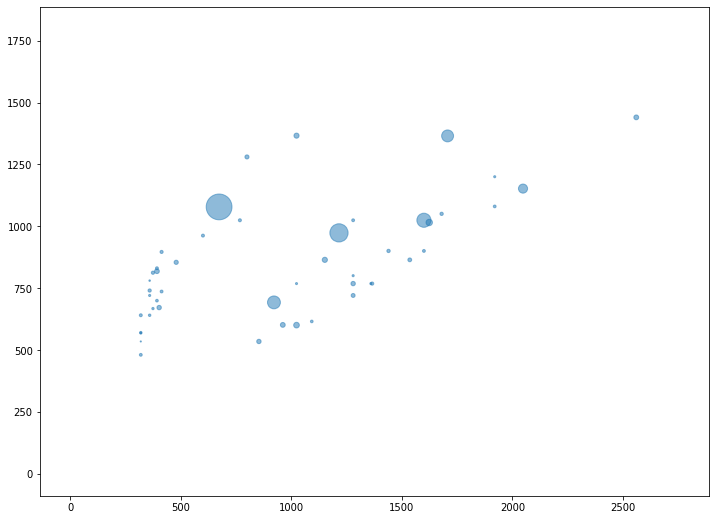

In [73]:
x = screens['ScreenWidth']
y = screens['ScreenHeight']
z = screens['convert']/screens['ScreenOrientation']

plt.scatter(x, y, s = z*2000, alpha = 0.5)
plt.show()

Честно говоря я надеялся на более вменяемый график, по которому можно какие-то однозначные выводы сделать, но не все так просто. Однако давайте сделаем несколько довольно понятных выводов:
1. Есть одно устройство, которое конвертит прямо очень хорошо, далее я выведу модель, аж интересно стало кто так конвертит
2. В целом экрана с большей шириной, чем высотой лучше конвертируют (исключение 1ый пункт), тоже касается размеров экрана, чем они больше в целом, тем пвероятнее конверсия (огромное скопление точек около 300-500px ширины все таки проигрывает хотя бы размером точек)

Что делать бизнесу в такой ситуации? Есть два пути: работать над качеством мобильной версии сайта, ориентироваться на десктопный/планшетный (это я бы еще проверил по DeviceCategory, но в большинстве рекламных систем нет отдельного деления на планшет, в отличии от моб. трафика) трафик

In [74]:
screens = convert.groupby(['ScreenHeight', 'ScreenWidth', 'MobilePhone', 'MobilePhoneModel']).agg({'convert' : 'sum', '`Date`': 'count'})
screens.reset_index()

,ScreenHeight,ScreenWidth,MobilePhone,MobilePhoneModel,convert,`Date`
0,0,0,apple,iPad,0,1
1,0,0,apple,iPhone,0,95
2,0,0,asus,ASUS_T00I,0,2
3,0,0,google,Nexus 5,0,6
4,0,0,huawei,CRO-L22,0,2
...,...,...,...,...,...,...
3143,1980,1081,xiaomi,Redmi 5 Plus,0,2
3144,2000,2000,apple,iPhone,0,94
3145,2048,1536,xiaomi,MI PAD,0,2
3146,2560,1440,samsung,SM-G935F,0,6


In [75]:
def convert_rate(row):
    return 1000*row['convert']/row['`Date`']

screens['CTR'] = screens.apply(convert_rate, axis = 1)

In [76]:
screens.reset_index()
screens.sort_values('CTR', ascending = False).head(10)

convert  `Date`  \
ScreenHeight ScreenWidth MobilePhone MobilePhoneModel                    
854          480         fly         IQ4504 Quad             1       2   
640          360         4good       Light A103              2       4   
                         nokia       Lumia 650               4      12   
1078         674         prestigio   PMT3118_3G              1       3   
640          320         zte         ZTE Blade L8RU          1       4   
600          1024        asus        P01Y                    2       9   
640          360         sony        Xperia C                1       6   
570          320         zte         ZTE BLADE A210          1       6   
640          360         sony        F8131                   1       7   
                         samsung     SM-A310F                1       8   

                                                              CTR  
ScreenHeight ScreenWidth MobilePhone MobilePhoneModel              
854          480         fly         IQ4504 Quad       500.000000  
640          360         4good       Light A103        500.000000  
                         nokia       Lumia 650         333.333333  
1078         674         prestigio   PMT3118_3G        333.333333  
640          320         zte         ZTE Blade L8RU    250.000000  
600          1024        asus        P01Y              222.222222  
640          360         sony        Xperia C          166.666667  
570          320         zte         ZTE BLADE A210    166.666667  
640          360         sony        F8131             142.857143  
                         samsung     SM-A310F          125.000000

Судя по всему то самое устройство, вызвавшее такой всплеск - это prestigio PMT3118_3G с нестандартным экраном, хоть и есть более высокие показатели CTR у других моделей, их результаты размываются другими моделями с таким же экраном. В любом случае данных слишком, мало, чтобы говорить, что весь бюджет надо заряжать на prestigio PMT3118_3G и он действительно так хорошо конвертит, по поробовать стоит :)

Найдем более статистически значемые данные

In [77]:
screens[screens['`Date`'] > 100].sort_values('CTR', ascending = False)

convert  `Date`  \
ScreenHeight ScreenWidth MobilePhone MobilePhoneModel                    
640          360         samsung     Galaxy J3              14     768   
                                     Galaxy S5               3     178   
1366         1024        apple       iPad                    2     147   
720          360         huawei      AUM-L29                 2     154   
740          360         samsung     SM-J600F                1     101   
...                                                        ...     ...   
720          360         huawei      AUM-L41                 0     199   
                                     BND-L21                 0     141   
640          360         huawei      DLI-TL20                0     140   
720          360         huawei      FIG-LX1                 0     225   
360          640         xiaomi      Redmi Note 4            0     103   

                                                             CTR  
ScreenHeight ScreenWidth MobilePhone MobilePhoneModel             
640          360         samsung     Galaxy J3         18.229167  
                                     Galaxy S5         16.853933  
1366         1024        apple       iPad              13.605442  
720          360         huawei      AUM-L29           12.987013  
740          360         samsung     SM-J600F           9.900990  
...                                                          ...  
720          360         huawei      AUM-L41            0.000000  
                                     BND-L21            0.000000  
640          360         huawei      DLI-TL20           0.000000  
720          360         huawei      FIG-LX1            0.000000  
360          640         xiaomi      Redmi Note 4       0.000000  

[74 rows x 3 columns]

Вот эта картина в разы интереснее, жаль не так много площадок позволяет таргетироваться по конкретным устройствам. И очень интересно почему устройства с одинаковым экраном, одинакового бренда, так разительно отличаются друг от друга результатами.
huawei	AUM-L29 в топе, и множество хуавей на дне. Возможно ответ лежит в плоскости программного обеспечения этих устройств и что там не работало, увы узнать сейчас уже не представляется возможным - старую версию сайта удалили.

## Итог
Гипотеза подтверждена, заодно узнали много интересного о возможных проблемах сайта на старых устройствах

# Гипотеза 2
Дни недели влияют на конверсию.

Довольно простая гипотеза и скорее всего верная, осталось определить какие дни лучше.

Для начала нам придется создать еще один столбец данных с днями недели. Боюсь процесс затянется, приедтся тащить библиотеку.

In [78]:
from datetime import datetime as dt

In [79]:
convert['dayofweek'] = convert['`Date`'].apply(lambda x: dt.isoweekday(dt.strptime(x, '%Y-%m-%d')))

In [80]:
days = convert.groupby('dayofweek').agg({'convert': 'sum', '`Date`': 'count'})

In [81]:
days.reset_index()

,dayofweek,convert,`Date`
0,1,80,25345
1,2,110,24972
2,3,89,23542
3,4,113,24577
4,5,80,22089
5,6,36,17999
6,7,53,17653


Вообще видно не вооруженным взглядом, но задание про графики, давайте все таки гистограмму построим

In [82]:
# Для начала нормируем конверт
days['CTR'] = days.apply(convert_rate, axis = 1)
days = days.reset_index()

names_of_day = {1 : 'Понедельник', 2: 'Вторник', 3: 'Среда', 4: 'Четверг', 5: 'Пятница', 6: 'Суббота', 7: 'Воскресенье'}
days['dayofweek'] = days['dayofweek'].apply(lambda x: names_of_day[x]) 

Text(0.5, 1.0, 'В какие дни лучше конверт')

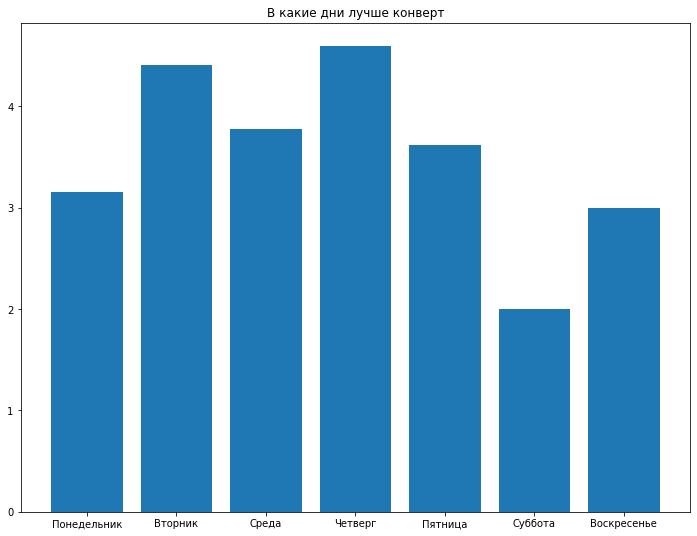

In [83]:
plt.bar(days['dayofweek'], days['CTR'])
plt.title('В какие дни лучше конверт')

## Выводы

эта гипотеза еще полезнее, здесь очевидно, что в дорогих источниках, где ROI около нуля или отрицательный надо 100% отключать субботу, конверт просто ужасный. Еще можно отключить воскресенье, а если все еще дорого - понедельник. 

# Гипотеза 3
Логичное продолжение второй гипотезы, посмотреть разбивку по времени, увы результатом проверки уже не стоит так сильно доверять - конверта явно маловато для 24х интервалов. Реклама дается только на Москву и область, поэтому временные зоны учитывать не имеет смысла (плюс ко всему счетчик с правильным временным поясом).

In [84]:
convert['hour'] = convert['`DateTime`'].apply(lambda x: x[11:13])
convert['hour']

46318     14
46295     18
46294     18
46293     18
46292     15
          ..
171570    14
171571    17
171572    17
171560    14
171719    11
Name: hour, Length: 156177, dtype: object

In [85]:
timeismoney = convert.groupby('hour').agg({'convert': 'sum', '`Date`': 'count'})
timeismoney['CTR'] = timeismoney.apply(convert_rate, axis = 1)
timeismoney = timeismoney.reset_index()

In [86]:
timeismoney

,hour,convert,`Date`,CTR
0,00,26,8775,2.962963
1,01,33,8767,3.764115
2,02,9,6786,1.326260
3,03,4,2325,1.720430
4,04,8,1406,5.689900
5,05,1,1026,0.974659
6,06,2,928,2.155172
7,07,1,754,1.326260
8,08,3,687,4.366812
9,09,1,717,1.394700


Text(0.5, 1.0, 'В какие часы лучше конверт')

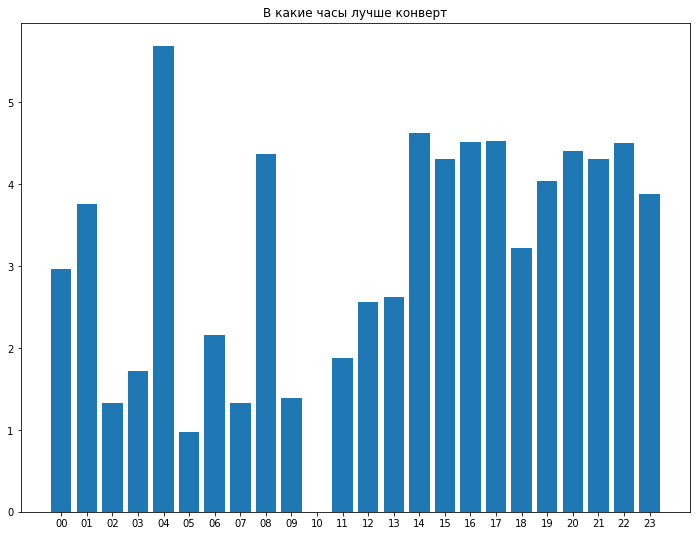

In [87]:
plt.bar(timeismoney['hour'], timeismoney['CTR'])
plt.title('В какие часы лучше конверт')

## Выводы
Ну что сказать, время с 12 до часу ночи весьма благоприятное, остальные интервалы вряд ли. Можно еще потестировать 4 часа ночи 8 утра, но мне кажется это аномалии, вызванные недостаточностью данных. (а вдруг все таки в 4 часа ночи у народа просыпается острое желание развлечаться :) ) Как и 10 часов не такое уж днище (хотя может все усиленно работают :)

Результат довольно предсказуем, но от этого не менее полезен. Остается загадкой, почему в яндекс метрике/директе до сих пор нет отчета по дням недели и часам (в гугл эдвордс кстати он есть). Наверное, боятся что тогда в "плохие" часы и дни никто не будет показывать рекламу :)

# Гипотеза 4

Еще одна временная гипотеза о сезонности интереса к определенным видам аттракциона.

Здесь надо будет проделать больше подготовительной работы. Для начала разметив все страницы.

In [89]:
from urllib.parse import urlparse

In [92]:
u = urlparse('http://attrakcion-vsem.ru/?target_ref=https:%2F%2Fott-widget.yandex.ru%2Fvideo%2F15687597891902948660%3Fautoplay%3D0%26from%3Dyavideo%26reqid%3D1556191228497682-1520007239060873276680248-man1-3617-V-TCH&adsdk-bundle-version=1390&adsdk-bundle-name=Multiroll&video-api-version=js:1.0-1390&ad-session-id=955711556191233576')
u

ParseResult(scheme='http', netloc='attrakcion-vsem.ru', path='/', params='', query='target_ref=https:%2F%2Fott-widget.yandex.ru%2Fvideo%2F15687597891902948660%3Fautoplay%3D0%26from%3Dyavideo%26reqid%3D1556191228497682-1520007239060873276680248-man1-3617-V-TCH&adsdk-bundle-version=1390&adsdk-bundle-name=Multiroll&video-api-version=js:1.0-1390&ad-session-id=955711556191233576', fragment='')

In [95]:
def get_pages(page):
    url = urlparse(str(page)) 
    if url.path != '/' :
        if url.path == '/index.php' :
            return url.query
        else :
            return url.path
    else :
        return 'blank'

In [144]:
hits['page'] = hits['URL'].apply(get_pages)

In [100]:
# Сделаем то, что должны были сделать еще раньше - уберем "искусственные" просмотры
pc = hits[hits['Artificial'] == 0]['page'].value_counts()

In [143]:
# есть некоторые замены, которые нужно произвести
rplc = {'option=com_content&view=article&id=13': '/аренда-аэрохоккея',
            'option=com_content&view=article&id=18': '/аренда-крокета',
            'option=com_content&view=article&id=19': '/аренда-мини-гольфа',
            'option=com_content&view=article&id=20': '/столы-армрестлинг',
            'option=com_content&view=article&id=22': '/nintendo-wii',
            'option=com_content&view=article&id=24': '/аттракцион-angry-birds',
            'option=com_content&amp;view=article&amp;id=24': '/аттракцион-angry-birds',
            'option=com_content&amp;view=article&amp;id=25': '/аренда-электромобили',
            'option=com_content&view=article&id=25': '/аренда-электромобили',
            'option=com_content&view=article&id=26': '/симулятор-сноуборда',
            'option=com_content&view=article&id=27': '/аренда-радио-машинок',
            'option=com_content&view=article&id=28': '/гоночный-симулятор',
            'option=com_content&view=article&id=29': '/аренда-лазерный-тир',
            'option=com_content&view=article&id=3': '/столы-для-покера',
            'option=com_content&view=article&id=31': '/аренда-дартс',
            'option=com_content&view=article&id=33': '/аренда-лототрона',
            'option=com_content&view=article&id=10': '/настольный-футбол',
            'option=com_content&view=article&id=42': '/аренда-казино',
            '/mini-golf': '/аренда-мини-гольфа',
            '/nastolnyj-tennis': '/настольный-теннис',
            '/radioupravlyaemye-modeli': '/аренда-радио-машинок',
            '/letayushchie-dengi': '/летающие-деньги',
            '/gonochnyj-simulyator': '/гоночный-симулятор',
            '/serditye-ptitsy': '/аттракцион-angry-birds',
            '/kroket': '/аренда-крокета',
            '/simulyator-snouborda': '/симулятор-сноуборда',
            '/gorodki-v-arendu': '/gorodki-v-arendu',
            '/nastolnyj-futbol': '/настольный-футбол',
            '/nastolnyj-khokkej': '/аренда-аэрохоккея',
            '/ruletka': '/аренда-рулетки',
            '/tekhasskij-poker': '/техасский-холдем',
            '/interaktivnyj-lazernyj-tir': '',
            '/arenda-lototrona': '/аренда-лототрона',
            '/xbox360': '/аренда-xbox360',
            '/koleso-fortuny': '/колесо-фортуны',
            '/kreps': '/аренда-столов-крэпс',
            '/tarakani-i-khomyachi-bega': '/тараканьи-бега',
            '/kto-my': '/kto-my',
            '/odnorukij-bandit': '/odnorukij-bandit',
            '/komplekt-1': '/аренда-казино',
            '/blek-dzhek': '/столы-blackjack',
            '/badminton': '/badminton',
            '/detskie-elektromobili': '/аренда-электромобили',
            '/darts-v-arendu': '/аренда-дартс',
            '/Sony-PlayStation': '/sony-playstation',
            '/Radioupravlyaemye-modeli': '/аренда-радио-машинок',
            '/shakhmaty-shashki-nardy': '/шахматы-шашки-нарды',
            '/сахарная-вата': '/сахарная-вата-аренда',
            '//колесо-фортуны': '/колесо-фортуны',
            '//аренда-крокета': '/аренда-крокета',
            '/aerokhokkej': '/аренда-аэрохоккея',
            '/channel/UC_HMKI5r0RQ612cIro5ZszQ': '/youtube',
            '/armrestling': '/столы-армрестлинг',
            '/казино-в-аренду': '/аренда-казино',
            '/предложение-агенствам': '/предложение-агентствам',
            '/attractionsrent/': '/instagram',
            '/attractionrent': '/instagram'
            }

def replace_pages(page):
    if page in rplc :
        return rplc[page]
    else :
        return page

In [145]:
hits['page'] = hits['page'].apply(replace_pages) 

In [ ]:
pc = hits[hits['Artificial'] == 0]['page'].value_counts()
dict(pc)

In [136]:
#очистим от другого мусора

def clean_trash(page):
    if (len(page) < 1) or ('/images/' in page) or (page[0] != '/') or ('/redir/' in page) or ('/collections/' in page) or ('/+' in page):
        return 'blank'
    else :
        return page

In [147]:
hits['page'] = hits['page'].apply(clean_trash) 

In [148]:
#Есть одна страница, которая была разделена на две '/popkorn-i-sakharnaya-vata'
#Чтобы не терять результаты с этой страницы разделим просмотры по страницам в прорпции просмотров этих отдельных страниц
import random

def split_pages(page):
    if page == '/popkorn-i-sakharnaya-vata':
        if random.randint(1, 4637) > 2861:
            return '/аренда-попкорн'
        else :
            return '/сахарная-вата-аренда'
    else:
        return page

In [150]:
hits['page'] = hits['page'].apply(split_pages) 

In [242]:
#допонительно избавимся от мусора через количество показов не менее 10
pc = hits[hits['Artificial'] == 0]['page'].value_counts()
pc = dict(pc)

for key in [key for key, value in pc.items() if value < 10]: del pc[key] #Классная штука, подсмотрел в интернете
    
#еще пару ненужных надо удалить
del pc['blank']
del pc['/meltsaev.denis'] #Ссылка на разработчика да :)

{'/аренда-радио-машинок': 9849,
 '/sony-playstation': 7044,
 '/аттракцион-angry-birds': 5913,
 '/сахарная-вата-аренда': 3592,
 '/аренда-электромобили': 3214,
 '/настольный-футбол': 3048,
 '/столы-для-покера': 2861,
 '/аренда-аэрохоккея': 2284,
 '/аренда-попкорн': 2159,
 '/аренда-лототрона': 2004,
 '/колесо-фортуны': 1993,
 '/аренда-казино': 1947,
 '/аренда-мини-гольфа': 1904,
 '/аренда-рулетки': 1868,
 '/летающие-деньги': 1844,
 '/тараканьи-бега': 1772,
 '/аренда-лазерный-тир': 1672,
 '/гоночный-симулятор': 1598,
 '/развлекательные-аттракционы': 1452,
 '/аренда-xbox360': 1398,
 '/kontakty': 1176,
 '/столы-армрестлинг': 1037,
 '/настольный-теннис': 1037,
 '/аренда-дартс': 984,
 '/симулятор-сноуборда': 832,
 '/аренда-бампербола': 828,
 '/столы-blackjack': 749,
 '/аренда-крокета': 733,
 '/доставка-аттракционов': 662,
 '/аренда-столов-крэпс': 644,
 '/аренда-аттракционов': 595,
 '/шахматы-шашки-нарды': 580,
 '/способы-оплаты': 572,
 '/спортивные-аттракционы': 566,
 '/предложение-агентствам'

Вот что значит подготовка данных!

In [244]:
pages = hits[(hits['Artificial'] == 0) & (hits['page'].isin(pc)) & (hits['page'].isnull() == False)][['`Date`', 'page', 'GoalsID', 'Referer']]
pages

,`Date`,page,GoalsID,Referer
0,2018-01-01,/аттракцион-angry-birds,NaN,http://yabs.yandex.ru/count/O6gDlVYCjUe50701CT...
1,2018-01-01,/sony-playstation,NaN,http://yabs.yandex.ru/count/S7i5NVPIZ_a506u1CQ...
4,2018-01-01,/аренда-радио-машинок,NaN,http://yabs.yandex.ru/count/KKRQxQe4Ure50841CI...
6,2018-01-01,/sony-playstation,NaN,http://yabs.yandex.ru/count/Heth3UqpfuS506i1CO...
7,2018-01-01,/аренда-радио-машинок,NaN,http://yandex.ru/searchapp?text=
...,...,...,...,...
171693,2019-10-30,/колесо-фортуны,NaN,NaN
171699,2019-10-30,/колесо-фортуны,NaN,NaN
171706,2019-10-30,/сахарная-вата-аренда,NaN,NaN
171714,2019-10-30,/колесо-фортуны,NaN,NaN


У меня будет своя разбивка по сезонам, ориентированная на учет праздничных дней в РФ

In [227]:
seasons = {
            'winter': [[11, 1], [1, 20]],
            'wo_man': [[1, 21], [3, 15]],
            'spring': [[3, 16], [5, 16]],
            'summer': [[5, 17], [8, 10]],
            'autumn': [[8, 11], [10,31]]
          }
#запись не очень понятной, но написано старт и конец сезона через задание [месяц, число]

In [224]:
def set_seasons(date):
    month = int(date[5:7])
    day = int(date[8:])
              
    for key, value in seasons.items():
        if (value[0][0] == month and value[0][1] <= day) or (value[1][0] == month and value[1][1] >= day) or (value[0][0] < month < value[1][0]) or (month == 12):
            return key
    
    return 'undefined'

In [245]:
pages['seasons'] = pages['`Date`'].apply(set_seasons)

In [246]:
#Подсчитаем количество дней в сезонах, чтобы нормировать количество просмотров
date_in_seasons = pages.groupby('seasons').agg({'`Date`': 'count'}).reset_index()
date_in_seasons = pd.Series(date_in_seasons['`Date`'].values, index = date_in_seasons.seasons).to_dict()
date_in_seasons

{'autumn': 14118,
 'spring': 10827,
 'summer': 23243,
 'winter': 14369,
 'wo_man': 13411}

In [248]:
sepage = pages.groupby(['seasons', 'page']).agg({'Referer': 'count'}).reset_index()

In [249]:
def normalize(row):
    return row['Referer']/date_in_seasons[row['seasons']] * 10000

In [250]:
sepage['shows'] = sepage.apply(normalize, axis = 1)

In [251]:
sepage

,seasons,page,Referer,shows
0,autumn,/badminton,8,5.666525
1,autumn,/frisbi,51,36.124097
2,autumn,/gorodki-v-arendu,71,50.290409
3,autumn,/instagram,47,33.290834
4,autumn,/kontakty,191,135.288284
...,...,...,...,...
258,wo_man,/столы-армрестлинг,234,174.483633
259,wo_man,/столы-для-покера,496,369.845649
260,wo_man,/тараканьи-бега,317,236.373127
261,wo_man,/техасский-холдем,53,39.519797


In [252]:
import seaborn as sns

In [261]:
heat = sepage.pivot_table(
                        index='seasons', 
                        columns='page', 
                        values='shows', 
                        aggfunc=sum).fillna(0).applymap(float)
heat

page,/badminton,/frisbi,/gorodki-v-arendu,/instagram,/kontakty,/kto-my,/nastolnyj-basketbol,/nintendo-wii,/odnorukij-bandit,/sony-playstation,...,/сахарная-вата-аренда,/симулятор-сноуборда,/спортивные-аттракционы,/способы-оплаты,/столы-blackjack,/столы-армрестлинг,/столы-для-покера,/тараканьи-бега,/техасский-холдем,/шахматы-шашки-нарды
seasons,,,,,,,,,,,,,,,,,,,,,
autumn,5.666525,36.124097,50.290409,33.290834,135.288284,2.124947,49.582094,36.832413,4.249894,1032.724182,...,217.452897,104.122397,41.790622,62.331775,87.122822,123.955234,349.907919,173.537328,48.873778,91.372716
spring,0.000000,0.000000,0.000000,14.777870,134.848065,0.000000,0.000000,49.875312,0.000000,883.901358,...,474.739078,80.354669,69.271266,75.736584,59.111481,108.986792,256.765494,191.188695,21.243188,49.875312
summer,6.883793,25.383987,20.221142,32.698017,140.687519,6.883793,38.721335,34.418965,9.034978,808.845674,...,548.552252,82.605516,55.930818,55.070344,64.535559,97.233576,231.037302,148.431786,34.418965,68.407693
winter,0.000000,19.486394,9.047255,24.357993,141.972301,13.918853,18.094509,59.155126,4.175656,984.062913,...,424.525019,129.445334,34.101190,68.202380,153.107384,92.560373,367.457721,167.722180,74.465864,82.121233
wo_man,0.000000,0.000000,0.000000,23.861010,172.246663,0.745657,0.000000,75.311312,0.000000,767.280591,...,325.106256,109.611513,37.282828,115.576765,102.900604,174.483633,369.845649,236.373127,39.519797,64.126463


In [265]:
rcParams['figure.figsize'] = 16,9

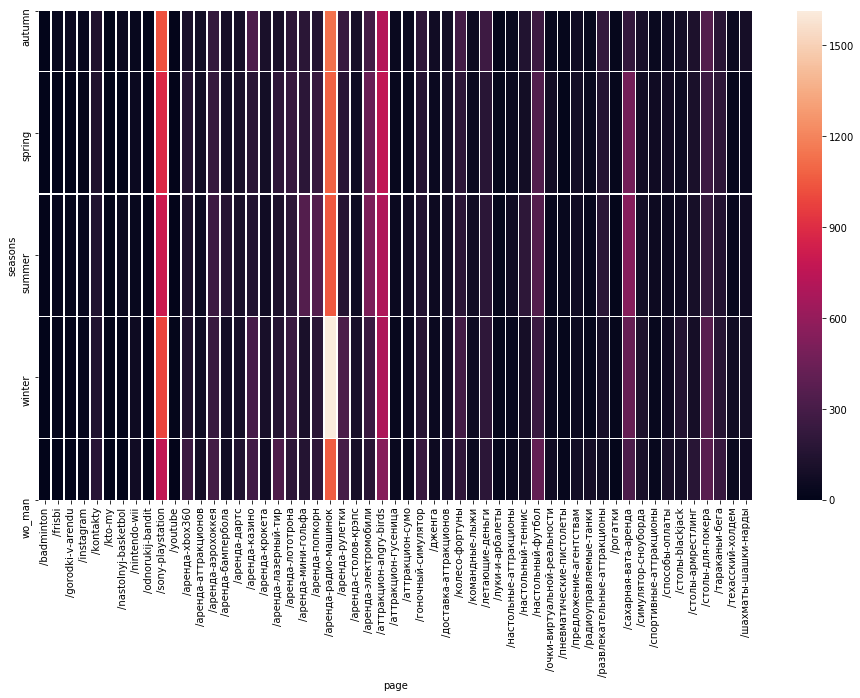

In [266]:
sns.heatmap(heat, linewidths=0.5)

## Промежуточный вывод

Как ни странно, сильной разницы в сезонности аттракционов нет. Есть только пару ярких исключений:
    1. На 23 февраля/8 марта настольный футбол пользуется большей популярностью, а вот зимой и осенью им не так активно интересуются
    2. Радио машинки пользуются большой популярностью, погоняем на корпоративе? :)
    3. В летние месяца большой популярностью пользуются попкорн и мини-гольф (это понятно), сахарная вата тоже
    4. Удивительно, но кажется что осень самый плохой сезон, хотя думал на лето (там ни одного праздника)

Вывод промежуточный, потому что хочу немного изменить подход к этой тепловой карте, т.к. сейчас по ней тяжело понять сезонность конкретного аттракциона - отдельные страницы вынуждены конкурировать с часто показываемыми страницами за яркость цвета

In [ ]:
pshow = pages.groupby('page').agg({'`Date`': 'count'}).reset_index()
pshow = pd.Series(pshow['`Date`'].values, index = pshow.page).to_dict()

In [271]:
def relative_show(row):
    return row['Referer']/pshow[row['page']] * 1000

sepage['shows'] = sepage.apply(relative_show, axis = 1)

In [272]:
heat = sepage.pivot_table(
                        index='seasons', 
                        columns='page', 
                        values='shows', 
                        aggfunc=sum).fillna(0).applymap(float)
heat

page,/badminton,/frisbi,/gorodki-v-arendu,/instagram,/kontakty,/kto-my,/nastolnyj-basketbol,/nintendo-wii,/odnorukij-bandit,/sony-playstation,...,/сахарная-вата-аренда,/симулятор-сноуборда,/спортивные-аттракционы,/способы-оплаты,/столы-blackjack,/столы-армрестлинг,/столы-для-покера,/тараканьи-бега,/техасский-холдем,/шахматы-шашки-нарды
seasons,,,,,,,,,,,,,,,,,,,,,
autumn,320.0,364.285714,522.058824,228.155340,162.414966,65.217391,360.824742,132.315522,146.341463,206.984668,...,85.467706,176.682692,104.240283,153.846154,164.218959,168.756027,172.666900,138.261851,194.366197,222.413793
spring,0.0,0.000000,0.000000,77.669903,124.149660,0.000000,0.000000,137.404580,0.000000,135.860307,...,143.095768,104.567308,132.508834,143.356643,85.447263,113.789778,97.168822,116.817156,64.788732,93.103448
summer,640.0,421.428571,345.588235,368.932039,278.061224,347.826087,463.917526,203.562341,512.195122,266.893810,...,354.955457,230.769231,229.681979,223.776224,200.267023,217.936355,187.696610,194.695260,225.352113,274.137931
winter,0.0,200.000000,95.588235,169.902913,173.469388,434.782609,134.020619,216.284987,146.341463,200.738217,...,169.821826,223.557692,86.572438,171.328671,293.724967,128.254581,184.550856,136.004515,301.408451,203.448276
wo_man,0.0,0.000000,0.000000,155.339806,196.428571,21.739130,0.000000,256.997455,0.000000,146.081772,...,121.380846,176.682692,88.339223,270.979021,184.245661,225.650916,173.365956,178.893905,149.295775,148.275862


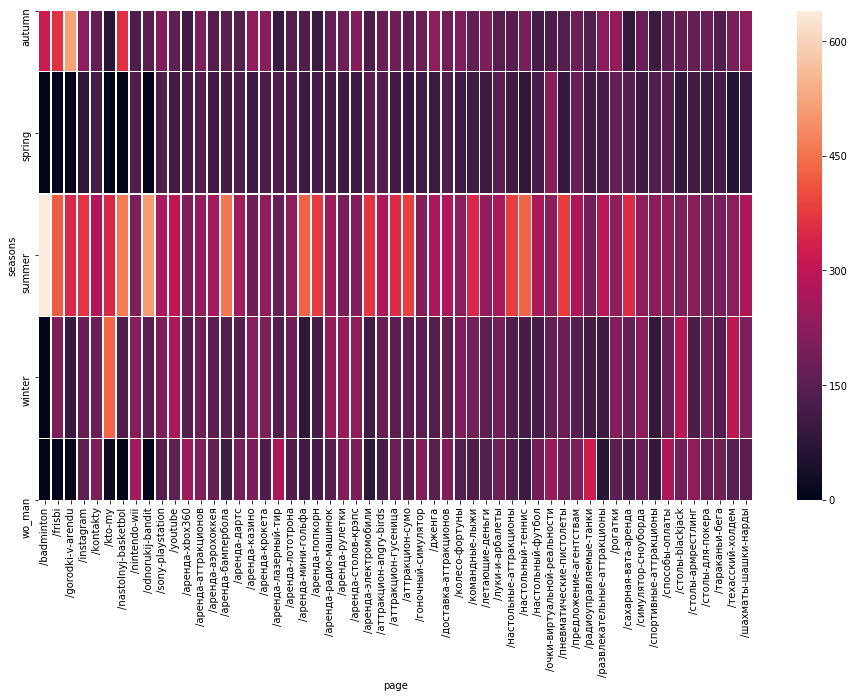

In [273]:
sns.heatmap(heat, linewidths=0.5)

# Выводы

Вот по этой карте уже можно делать выводы о сезонной популярности аттракционов, строить из этого стратегию по рекламе, а также выстраивать ценовую политику

# Гипотеза 5

И последняя гипотеза, которую интересно рассмотреть, это какие аттракционы просматривают вместе, чтобы на основе этого составить рекомендации

Это не такая уж трививальная задача, так как нужно учитывать не только прямые переходы, но цепочки переходов

In [291]:
hits['ref_page'] = hits['Referer'].apply(get_pages)
hits['ref_page'] = hits['ref_page'].apply(replace_pages) 
hits['ref_page'] = hits['ref_page'].apply(split_pages)
relations = hits[(hits['ref_page'].isin(pc)) & (hits['page'].isin(pc))][['ref_page', 'page', 'ClientID', '`Date`']]

Для поиска цепочек перехода будем использовать CLientID

In [296]:
relations.sort_values(['ClientID', '`Date`'], inplace = True)

In [313]:
#Я хочу проверить если клиент вернется через долгое время, то метрика будет его под тем же ID считать или нет 
check = relations.groupby('ClientID').agg({'`Date`' : ['min', 'max']}).reset_index()
check.columns = ['ClientID', 'min', 'max']
check[check['min'] != check['max']].head()

,ClientID,min,max
18,15114336716236063,2017-11-23,2017-12-04
25,15279731443604487,2018-06-02,2018-06-03
36,15559247764072885,2019-04-22,2019-04-24
39,15644888165839339,2019-07-30,2019-09-03
41,15703032037556018,2019-10-05,2019-10-06


Ответ положительный, значит придется еще разделять визиты от одного клиента (разница в датах должна быть не больше 1го дня)

In [318]:
page_numbers = {} #надо присвоить каждой странице порядковый номер, чтобы проще было задать матрицу связи между страницами
pnum = 0

for key in pc.keys():
    page_numbers[key] = pnum
    pnum += 1

In [385]:
relations = hits[(hits['ref_page'].isin(pc)) & (hits['page'].isin(pc))][['ref_page', 'page', 'ClientID', '`DateTime`']] 
relations.sort_values(['ClientID', '`DateTime`'], inplace = True) #мне все-таки понадобится время для того, чтобы правильно отсортировалась последовательность визита
relations.head()

,ref_page,page,ClientID,`DateTime`
77530,/аренда-электромобили,/kontakty,1496918615353240,2017-06-08 16:43:20
102972,/аренда-электромобили,/kontakty,1496918615353240,2017-06-08 16:43:20
142948,/колесо-фортуны,/столы-blackjack,1509302583441423,2017-10-30 00:44:34
62768,/летающие-деньги,/колесо-фортуны,1538250253764637,2018-09-30 01:46:17
62769,/летающие-деньги,/аренда-рулетки,1538250253764637,2018-09-30 01:46:26


In [322]:
import numpy as np

In [352]:
last_client = ''
last_date = ''
links = []

rel = np.zeros((len(page_numbers), len(page_numbers)))

def calc_relations(row, both = True):
    global last_client, last_date, links, rel
    
    '''
        both means that it is not important which page is Referer, relation will be +1 for both
    '''
    
    date = row['`DateTime`']
    date = dt.strptime(date, '%Y-%m-%d %H:%M:%S')
    
    ref = page_numbers[row['ref_page']]
    page = page_numbers[row['page']]
    
    # Начало новой цепочки
    if last_client == '' or row['ClientID'] != last_client or (date - last_date).days > 1 :
        last_client = row['ClientID']
        last_date = date
        links = [ ref, page ]
        rel[page][ref] += 1
        if both : rel[ref][page] += 1
    else :
        if links[-1] != ref : links.append(ref) #На случай если каким то образом в цепочке произошел разрыв, когда было 1-2-3 (ТЫ ГДЕ БЫЛ?) 5-6
        
        for r in links: #Проходим по всей цепочки и считаем все страницы связанными
            rel[page][r] += 1
            if both : rel[r][page] += 1
                
relations.apply(calc_relations, axis = 1)
rel

array([[794., 155., 356., ...,   9.,   5.,   3.],
       [155., 514., 158., ...,   9.,   4.,   0.],
       [356., 158., 628., ...,  13.,   4.,  29.],
       ...,
       [  9.,   9.,  13., ...,   8.,   2.,   0.],
       [  5.,   4.,   4., ...,   2.,   2.,   2.],
       [  3.,   0.,  29., ...,   0.,   2.,   2.]])

In [358]:
rel[np.diag_indices_from(rel)] = 0 #Сбросим диагональные значения, чтобы они не мещали восприятию

#Теперь сделаем карту более понятной на слабопросматриваемых страницах
pn = {v:k for k, v in page_numbers.items()} #Ревертим словарь номеров страниц

for x in rel:
    for j in range(len(x)-1):
        x[j] = 1000 * x[j] / pshow[pn[j]]

In [357]:
page_numbers

{'/аренда-радио-машинок': 0,
 '/sony-playstation': 1,
 '/аттракцион-angry-birds': 2,
 '/сахарная-вата-аренда': 3,
 '/аренда-электромобили': 4,
 '/настольный-футбол': 5,
 '/столы-для-покера': 6,
 '/аренда-аэрохоккея': 7,
 '/аренда-попкорн': 8,
 '/аренда-лототрона': 9,
 '/колесо-фортуны': 10,
 '/аренда-казино': 11,
 '/аренда-мини-гольфа': 12,
 '/аренда-рулетки': 13,
 '/летающие-деньги': 14,
 '/тараканьи-бега': 15,
 '/аренда-лазерный-тир': 16,
 '/гоночный-симулятор': 17,
 '/развлекательные-аттракционы': 18,
 '/аренда-xbox360': 19,
 '/kontakty': 20,
 '/столы-армрестлинг': 21,
 '/настольный-теннис': 22,
 '/аренда-дартс': 23,
 '/симулятор-сноуборда': 24,
 '/аренда-бампербола': 25,
 '/столы-blackjack': 26,
 '/аренда-крокета': 27,
 '/доставка-аттракционов': 28,
 '/аренда-столов-крэпс': 29,
 '/аренда-аттракционов': 30,
 '/шахматы-шашки-нарды': 31,
 '/способы-оплаты': 32,
 '/спортивные-аттракционы': 33,
 '/предложение-агентствам': 34,
 '/дженга': 35,
 '/командные-лыжи': 36,
 '/аттракцион-сумо': 

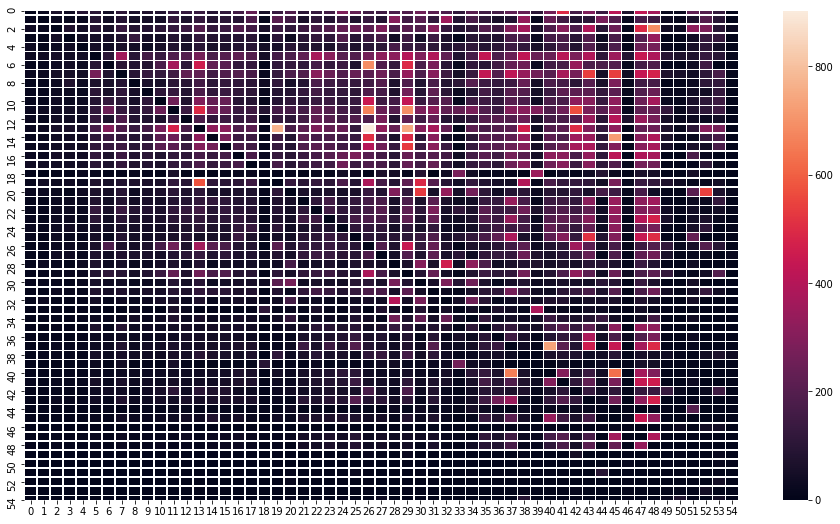

In [354]:
sns.heatmap(rel, linewidths=0.5)

Без нормализации тепловая карта была бы симметричная, что-то мне подсказывает, что если выключить режим учета связей в обе стороны, картина будет интереснее

In [360]:
last_client = ''
last_date = ''
links = []

rel = np.zeros((len(page_numbers), len(page_numbers)))

relations.apply((lambda x: calc_relations(x, both = False)), axis = 1)
rel

array([[397.,  86., 170., ...,   4.,   4.,   3.],
       [ 69., 257.,  58., ...,   1.,   1.,   0.],
       [186., 100., 314., ...,   4.,   1.,   4.],
       ...,
       [  5.,   8.,   9., ...,   4.,   1.,   0.],
       [  1.,   3.,   3., ...,   1.,   1.,   0.],
       [  0.,   0.,  25., ...,   0.,   2.,   1.]])

In [361]:
rel[np.diag_indices_from(rel)] = 0 #Сбросим диагональные значения, чтобы они не мещали восприятию

#Теперь сделаем карту более понятной на слабопросматриваемых страницах
pn = {v:k for k, v in page_numbers.items()} #Ревертим словарь номеров страниц

for x in rel:
    for j in range(len(x)-1):
        x[j] = 1000 * x[j] / pshow[pn[j]]

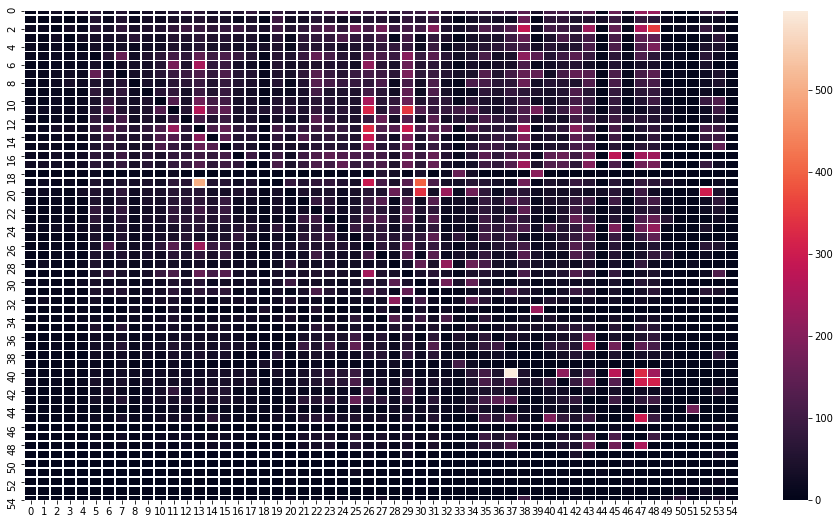

In [371]:
sns.heatmap(rel, linewidths=0.5)

# Выводы

Отличная тепловая карта, которая поможет сделать блок рекомендации на каждом аттракционе максимально кликабельным, лучше просматривать построчно, чтобы видить относительно слабые взаимосвязи лучше. Спасибо за внимание! Дальше я сам :)

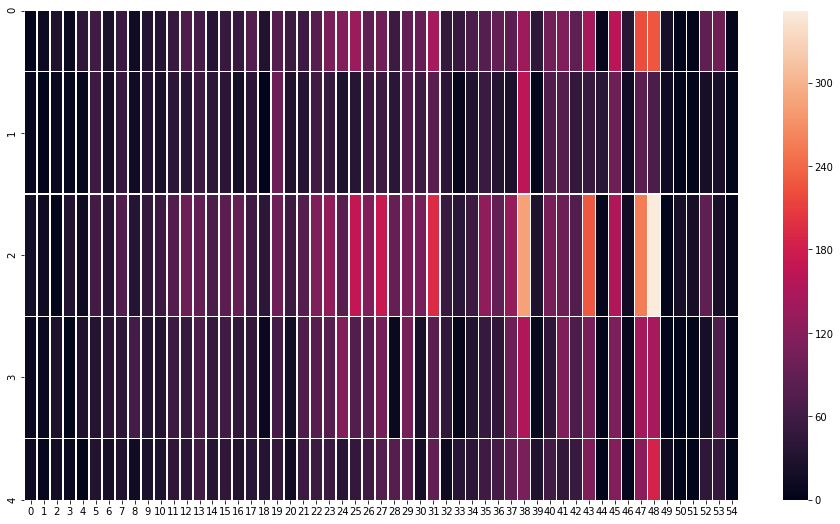

In [381]:
sns.heatmap(rel[:5], linewidths=0.5) #по y страница на которой нужно разместить страницу с x в рекомендацию

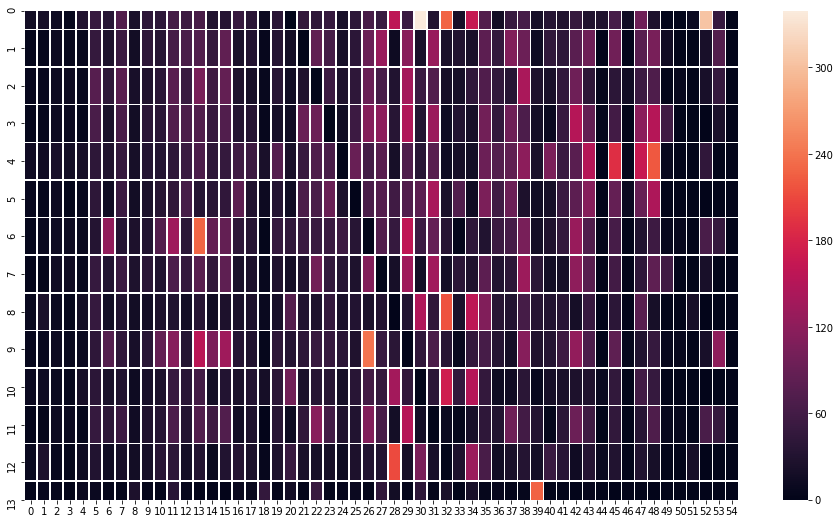

In [384]:
sns.heatmap(rel[20:34], linewidths=0.5)